In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir=tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='c:\data\myimages',untar=True)

In [4]:
data_dir

'c:\\data\\myimages\\datasets\\flower_photos'

In [5]:
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('c:/data/myimages/datasets/flower_photos')

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

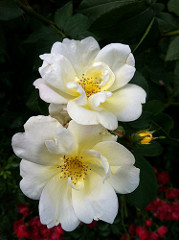

In [8]:
PIL.Image.open(str(roses[0]))

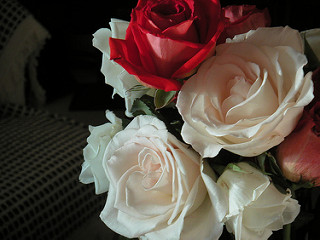

In [9]:
PIL.Image.open(str(roses[1]))

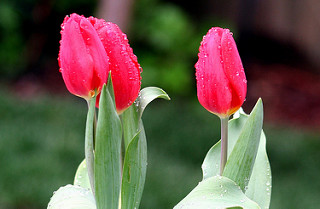

In [10]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

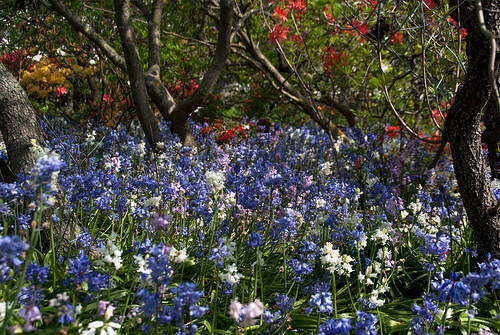

In [11]:
PIL.Image.open(str(tulips[1]))

In [12]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}                                

In [13]:
flowers_images_dict['roses'][:5]

[WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('c:/data/myimages/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [14]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [15]:
str(flowers_images_dict['roses'][0])

'c:\\data\\myimages\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [16]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [17]:
img.shape

(240, 179, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [19]:
for flower_name,images in flowers_images_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [20]:
X,y=[],[]

for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
y[:5]

[0, 0, 0, 0, 0]

In [22]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [23]:
X=np.array(X)
y=np.array(y)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [25]:
len(X_train)

2752

In [26]:
len(X_test)

918

In [27]:
X_train[0]

array([[[ 68,  79,  77],
        [ 63,  70,  63],
        [ 60,  62,  56],
        ...,
        [ 49,  40,  37],
        [ 48,  39,  36],
        [ 48,  39,  36]],

       [[ 57,  62,  60],
        [ 61,  64,  60],
        [ 60,  61,  55],
        ...,
        [ 48,  39,  36],
        [ 48,  39,  36],
        [ 50,  41,  38]],

       [[ 61,  58,  57],
        [ 64,  64,  59],
        [ 59,  59,  53],
        ...,
        [ 49,  40,  37],
        [ 49,  40,  37],
        [ 50,  41,  38]],

       ...,

       [[ 49, 121,  93],
        [ 40,  65,  51],
        [ 52,  96,  67],
        ...,
        [156, 216, 211],
        [161, 216, 212],
        [169, 203, 206]],

       [[ 48, 119,  90],
        [ 45,  58,  44],
        [ 50,  91,  60],
        ...,
        [217, 233, 238],
        [201, 212, 215],
        [185, 168, 175]],

       [[ 54, 121,  95],
        [ 46,  58,  46],
        [ 46,  89,  60],
        ...,
        [227, 245, 248],
        [219, 201, 204],
        [108,  81,  83]]

In [28]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [29]:
X_train_scaled[0]

array([[[0.26666667, 0.30980392, 0.30196078],
        [0.24705882, 0.2745098 , 0.24705882],
        [0.23529412, 0.24313725, 0.21960784],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.22352941, 0.24313725, 0.23529412],
        [0.23921569, 0.25098039, 0.23529412],
        [0.23529412, 0.23921569, 0.21568627],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.23921569, 0.22745098, 0.22352941],
        [0.25098039, 0.25098039, 0.23137255],
        [0.23137255, 0.23137255, 0.20784314],
        ...,
        [0.19215686, 0.15686275, 0.14509804],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16078431, 0.14901961]],

       ...,

       [[0.19215686, 0.4745098 , 0.36470588],
        [0.15686275, 0.25490196, 0.2       ],
        [0.20392157, 0

In [30]:
num_classes=5

In [31]:
X_train.shape

(2752, 180, 180, 3)

In [32]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 74s 758ms/step - loss: 1.3808 - accuracy: 0.4150
Epoch 2/10
86/86 [==============================] - 65s 754ms/step - loss: 1.0397 - accuracy: 0.5923
Epoch 3/10
86/86 [==============================] - 65s 751ms/step - loss: 0.8502 - accuracy: 0.6748
Epoch 4/10
86/86 [==============================] - 65s 756ms/step - loss: 0.6490 - accuracy: 0.7584
Epoch 5/10
86/86 [==============================] - 65s 754ms/step - loss: 0.4627 - accuracy: 0.8354
Epoch 6/10
86/86 [==============================] - 65s 757ms/step - loss: 0.2663 - accuracy: 0.9172
Epoch 7/10
86/86 [==============================] - 65s 752ms/step - loss: 0.1334 - accuracy: 0.9578
Epoch 8/10
86/86 [==============================] - 65s 753ms/step - loss: 0.0982 - accuracy: 0.9749
Epoch 9/10
86/86 [==============================] - 64s 743ms/step - loss: 0.0814 - accuracy: 0.9797
Epoch 10/10
86/86 [==============================] - 65s 753ms/step - loss: 0.0245 - accura

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 6s 209ms/step - loss: 1.8572 - accuracy: 0.6471


[1.8571763038635254, 0.6470588445663452]

In [34]:
predictions=model.predict(X_test_scaled)
predictions

29/29 [==============================] - 6s 203ms/step


array([[ 1.4423161e+00,  1.1986224e+01, -3.6966913e+00, -1.7580448e+01,
        -4.4205160e+00],
       [ 7.8457637e+00,  5.0226212e-01, -6.4170671e+00, -4.3788714e+00,
         4.5287137e+00],
       [-5.1862621e+00,  3.9819775e+00,  9.2576303e+00, -1.0820038e+01,
        -4.1016479e+00],
       ...,
       [-1.7703979e+00, -2.6235691e-01, -1.1957316e+01,  3.6678562e+00,
         6.2931299e+00],
       [ 2.0367889e+00,  4.9594460e+00, -4.9533849e+00, -3.6224599e-03,
        -1.9213091e+00],
       [ 5.7919931e-01, -9.0033140e+00,  2.4563169e+00,  4.7832537e+00,
        -1.8741544e-02]], dtype=float32)

In [35]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.6352836e-05, 9.9997342e-01, 1.5452001e-07, 1.4432627e-13,
       7.4925858e-08], dtype=float32)>

In [36]:
np.argmax(score)

1

In [37]:
y_test[0]

1

In [38]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
])

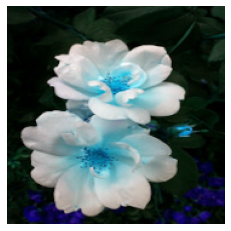

In [39]:
plt.axis('off')
plt.imshow(X[0])

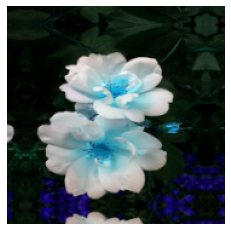

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [41]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
])

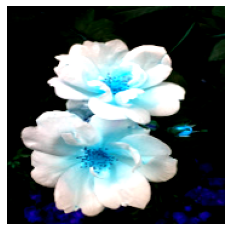

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [43]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.2)
])

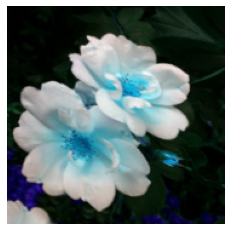

In [44]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [45]:
data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [46]:
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
86/86 [==============================] - 82s 879ms/step - loss: 1.3212 - accuracy: 0.4255
Epoch 2/10
86/86 [==============================] - 77s 899ms/step - loss: 1.0590 - accuracy: 0.5745
Epoch 3/10
86/86 [==============================] - 77s 898ms/step - loss: 0.9441 - accuracy: 0.6294
Epoch 4/10
86/86 [==============================] - 77s 892ms/step - loss: 0.8661 - accuracy: 0.6704
Epoch 5/10
86/86 [==============================] - 77s 894ms/step - loss: 0.8060 - accuracy: 0.6886
Epoch 6/10
86/86 [==============================] - 77s 895ms/step - loss: 0.7722 - accuracy: 0.7093
Epoch 7/10
86/86 [==============================] - 76s 886ms/step - loss: 0.7347 - accuracy: 0.7206
Epoch 8/10
86/86 [==============================] - 75s 874ms/step - loss: 0.6799 - accuracy: 0.7373
Epoch 9/10
86/86 [==============================] - 75s 873ms/step - loss: 0.6522 - accuracy: 0.7482
Epoch 10/10
86/86 [==============================] - 75s 874ms/step - loss: 0.6290 - accura

In [47]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 199ms/step - loss: 0.7344 - accuracy: 0.7244


[0.7344496846199036, 0.7244008779525757]